In [13]:
# This script is to analyze the dataset of Aribnb for Seattle
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
#data collection and processing
# loading the csv data to a pandas dataframe
calendar_data = pd.read_csv('DataSeattle/calendar.csv')
listings_data = pd.read_csv('DataSeattle/listings.csv')
reviews_data = pd.read_csv('DataSeattle/reviews.csv')

In [9]:
calendar_data.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [11]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [12]:
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [14]:
calendar_data.tail()

,listing_id,date,available,price
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN
1393569,10208623,2017-01-02,f,NaN


In [17]:
calendar_data.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [19]:
reviews_data.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [22]:
calendar_data.groupby(['listing_id']).sum()

,date,available,price
listing_id,,,
3335,2016-01-042016-01-052016-01-062016-01-072016-0...,ffffffffffffffffffffffffffffffffffffffffffffff...,$120.00$120.00$120.00$120.00$120.00$120.00$120...
4291,2016-01-042016-01-052016-01-062016-01-072016-0...,tttttttttttttttttttttttttttttttttttttttttttttt...,$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82....
5682,2016-01-042016-01-052016-01-062016-01-072016-0...,ffffffftttttfffttfffffttffftttttfffftttttttttt...,$50.00$50.00$50.00$50.00$50.00$49.00$49.00$50....
6606,2016-01-042016-01-052016-01-062016-01-072016-0...,tttttttttttttttttttttttttttttttttttttttttttttt...,$90.00$90.00$90.00$90.00$100.00$100.00$90.00$9...
7369,2016-01-042016-01-052016-01-062016-01-072016-0...,ffffffffffttftfffffffffffffffffffffffffttttttt...,$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85....
...,...,...,...
10332096,2016-01-042016-01-052016-01-062016-01-072016-0...,tttttttttttttttttttttttttttttttttttttttttttttt...,$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40....
10334184,2016-01-042016-01-052016-01-062016-01-072016-0...,fffftttttttttttttttttttttttttttttttttttttttttt...,$120.00$120.00$120.00$120.00$120.00$120.00$120...
10339144,2016-01-042016-01-052016-01-062016-01-072016-0...,ffffffffffffffffffffffffffffffffffffffffffffff...,0


In [23]:
calendar_data.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [25]:
dummy_Avaibale = pd.get_dummies(calendar_data['available'])

In [27]:
calendar_data = calendar_data.drop(['available'], axis =1)

In [29]:
calendar_data = pd.concat([calendar_data, dummy_Avaibale], axis =1)

In [30]:
calendar_data.head()

,listing_id,date,price,f,t
0,241032,2016-01-04,$85.00,0,1
1,241032,2016-01-05,$85.00,0,1
2,241032,2016-01-06,NaN,1,0
3,241032,2016-01-07,NaN,1,0
4,241032,2016-01-08,NaN,1,0


In [142]:
occupied_df = calendar_data.groupby(['listing_id']).sum()
occupied_df

,f,t
listing_id,,
3335,56.0,309.0
4291,0.0,365.0
5682,56.0,309.0
6606,0.0,365.0
7369,312.0,53.0
...,...,...
10332096,0.0,365.0
10334184,4.0,361.0
10339144,365.0,0.0


Text(0, 0.5, 'Listings')

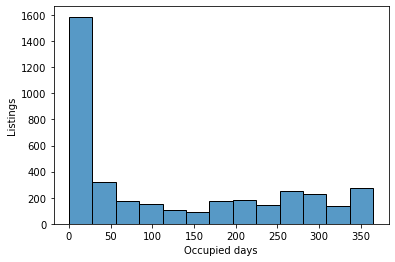

In [37]:
sns.histplot(data = occupied_df, x='f')
plt.xlabel("Occupied days")
plt.ylabel("Listings")

In [38]:
calendar_data.groupby(['listing_id']).count()

,date,price,f,t
listing_id,,,,
3335,365,309,365,365
4291,365,365,365,365
5682,365,309,365,365
6606,365,365,365,365
7369,365,53,365,365
...,...,...,...,...
10332096,365,365,365,365
10334184,365,361,365,365
10339144,365,0,365,365


In [130]:
calendar_data_dorpnaprice = calendar_data.dropna(subset=['price'], axis =0)

In [143]:
calendar_data_dorpnaprice.head()

0

In [132]:
num_price = pd.to_numeric(calendar_data_dorpnaprice['price'].replace('[^0-9\.-]','',regex =True))
num_price = num_price.rename("num_price")

In [133]:
calendar_data_dorpnaprice = pd.concat([calendar_data_dorpnaprice, num_price], axis =1)
calendar_data_dorpnaprice.dtypes
calendar_data_dorpnaprice.head()

,listing_id,date,price,f,t,num_price
0,241032,2016-01-04,$85.00,0,1,85.0
1,241032,2016-01-05,$85.00,0,1,85.0
9,241032,2016-01-13,$85.00,0,1,85.0
10,241032,2016-01-14,$85.00,0,1,85.0
14,241032,2016-01-18,$85.00,0,1,85.0


In [138]:
mean_price_by_listing = calendar_data_dorpnaprice.groupby(['listing_id']).mean()

In [139]:
Sum_occ_days_by_listing = calendar_data_dorpnaprice.groupby(['listing_id']).sum()

<AxesSubplot:xlabel='num_price', ylabel='t'>

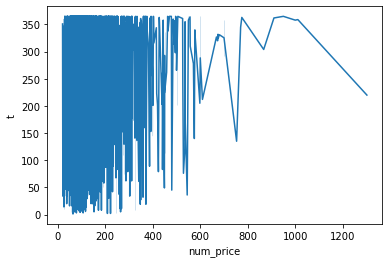

In [144]:
sns.lineplot(x=mean_price_by_listing['num_price'],y=Sum_occ_days_by_listing['t'])

In [145]:
listings_data.shape

(3818, 92)

In [146]:
occupied_df.shape

(3818, 2)

In [147]:
occupied_more300_df = occupied_df[occupied_df['f'] >= 300]
occupied_more300_df

,f,t
listing_id,,
7369,312.0,53.0
9460,308.0,57.0
53867,345.0,20.0
107046,365.0,0.0
107962,328.0,37.0
...,...,...
10252110,346.0,19.0
10299108,300.0,65.0
10299195,351.0,14.0


In [150]:
occupied_more300_df = occupied_more300_df.merge(mean_price_by_listing, on='listing_id', how ='inner')
occupied_more300_df

,f_x,t_x,f_y,t_y,num_price_x,f,t,num_price_y
listing_id,,,,,,,,
7369,312.0,53.0,0.0,1.0,85.000000,0.0,1.0,85.000000
9460,308.0,57.0,0.0,1.0,113.736842,0.0,1.0,113.736842
53867,345.0,20.0,0.0,1.0,94.600000,0.0,1.0,94.600000
107962,328.0,37.0,0.0,1.0,100.000000,0.0,1.0,100.000000
182716,302.0,63.0,0.0,1.0,76.000000,0.0,1.0,76.000000
...,...,...,...,...,...,...,...,...
10250735,361.0,4.0,0.0,1.0,75.000000,0.0,1.0,75.000000
10252110,346.0,19.0,0.0,1.0,347.368421,0.0,1.0,347.368421
10299108,300.0,65.0,0.0,1.0,58.000000,0.0,1.0,58.000000


Text(0, 0.5, 'Occupied days(d)')

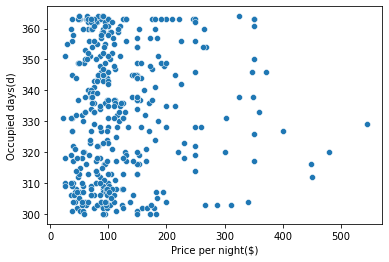

In [154]:
sns.scatterplot(data = occupied_more300_df, x = 'num_price_x', y = 'f_x')
plt.xlabel('Price per night($)')
plt.ylabel('Occupied days(d)')

In [217]:
listings_data.rename(columns = {'id':'listing_id'}, inplace = True)
listings_data

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [218]:
listings_data['review_scores_value'].isnull().sum()/len(listings_data['review_scores_value'])

0.17181770560502882

In [219]:
listings_data_drop_noscore = listings_data.dropna(subset=['review_scores_value'], axis =0)

In [220]:
score_df = listings_data_drop_noscore.groupby(['listing_id']).mean()

In [221]:
score_df['review_scores_value']

listing_id
4291         9.0
5682        10.0
6606         9.0
7369         9.0
9419         9.0
            ... 
9970805     10.0
9995551     10.0
10012724    10.0
10020221    10.0
10118341    10.0
Name: review_scores_value, Length: 3162, dtype: float64

In [224]:
occupied_more300_df = occupied_more300_df.merge(score_df, on='listing_id', how ='inner')
occupied_more300_df

,f_x,t_x,f_y,t_y,num_price_x,f,t,num_price_y,scrape_id_x,host_id_x,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
listing_id,,,,,,,,,,,,,,,,,,,,,
7369,312.0,53.0,0.0,1.0,85.000000,0.0,1.0,85.000000,2.016010e+13,19425.0,...,94.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,1.0,0.50
9460,308.0,57.0,0.0,1.0,113.736842,0.0,1.0,113.736842,2.016010e+13,30832.0,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.0,3.11
53867,345.0,20.0,0.0,1.0,94.600000,0.0,1.0,94.600000,2.016010e+13,187753.0,...,96.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,1.0,4.52
107962,328.0,37.0,0.0,1.0,100.000000,0.0,1.0,100.000000,2.016010e+13,112093.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.0,2.88
182716,302.0,63.0,0.0,1.0,76.000000,0.0,1.0,76.000000,2.016010e+13,181621.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.0,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9727857,309.0,56.0,0.0,1.0,25.000000,0.0,1.0,25.000000,2.016010e+13,50201633.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.0,3.00
9863484,304.0,61.0,0.0,1.0,95.000000,0.0,1.0,95.000000,2.016010e+13,6590511.0,...,100.0,10.0,9.0,10.0,10.0,10.0,10.0,NaN,2.0,2.00
9866461,308.0,57.0,0.0,1.0,97.894737,0.0,1.0,97.894737,2.016010e+13,22969709.0,...,80.0,10.0,8.0,10.0,10.0,10.0,10.0,NaN,1.0,1.00


In [225]:
occupied_more300_df['review_scores_value']

listing_id
7369         9.0
9460        10.0
53867       10.0
107962      10.0
182716      10.0
            ... 
9727857     10.0
9863484     10.0
9866461     10.0
10012724    10.0
10118341    10.0
Name: review_scores_value, Length: 261, dtype: float64

Text(0, 0.5, 'Occupied days(d)')

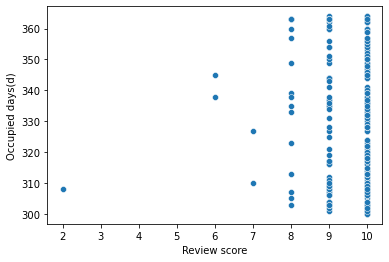

In [226]:
sns.scatterplot(data = occupied_more300_df, x = 'review_scores_value', y = 'f_x')
plt.xlabel('Review score')
plt.ylabel('Occupied days(d)')

In [204]:
occupied_df = occupied_df.merge(score_df, on='listing_id', how ='inner')
occupied_df

,f,t,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
listing_id,,,,,,,,,,,,,,,,,,,,,
4291,0.0,365.0,2.016010e+13,35749.0,6.0,6.0,47.687251,-122.313130,2.0,1.0,...,92.0,10.0,9.0,10.0,9.0,9.0,9.0,NaN,5.0,1.14
5682,56.0,309.0,2.016010e+13,8993.0,1.0,1.0,47.523980,-122.359891,2.0,1.0,...,96.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,1.0,4.21
6606,0.0,365.0,2.016010e+13,14942.0,3.0,3.0,47.654109,-122.337605,2.0,1.0,...,93.0,9.0,9.0,10.0,9.0,10.0,9.0,NaN,1.0,0.66
7369,312.0,53.0,2.016010e+13,19425.0,1.0,1.0,47.615397,-122.325640,2.0,1.0,...,94.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,1.0,0.50
9419,0.0,365.0,2.016010e+13,30559.0,5.0,5.0,47.550620,-122.320135,2.0,3.0,...,91.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,5.0,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970805,0.0,365.0,2.016010e+13,807116.0,3.0,3.0,47.620333,-122.316204,6.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.0,1.00
9995551,5.0,360.0,2.016010e+13,38387186.0,2.0,2.0,47.666394,-122.288173,2.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.0,1.00
10012724,318.0,47.0,2.016010e+13,50201633.0,2.0,2.0,47.614853,-122.323992,1.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.0,2.00


Text(0, 0.5, 'Occupied days(d)')

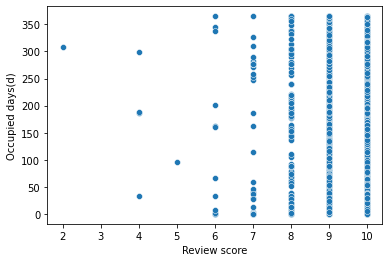

In [206]:
sns.scatterplot(data = occupied_df, x = 'review_scores_value', y = 'f')
plt.xlabel('Review score')
plt.ylabel('Occupied days(d)')

In [227]:
listings_data.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type',

In [243]:
nei_df = listings_data.groupby(['neighbourhood']).count()
nei_df

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Alki,23,23,23,23,23,20,19,23,23,17,...,15,23,0,23,23,23,23,23,23,16
Arbor Heights,3,3,3,3,3,3,3,3,3,3,...,3,3,0,3,3,3,3,3,3,3
Atlantic,50,50,50,50,50,44,40,50,50,31,...,43,50,0,50,50,50,50,50,50,44
Ballard,213,213,213,213,213,203,192,213,213,167,...,183,213,0,213,213,213,213,213,213,183
Belltown,204,204,204,204,204,190,177,204,204,133,...,182,204,0,204,204,204,204,204,204,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallingford,143,143,143,143,143,136,134,143,143,125,...,125,143,0,143,143,143,143,143,143,126
Wedgewood,15,15,15,15,15,11,14,15,15,10,...,10,15,0,15,15,15,15,15,15,10
Westlake,12,12,12,12,12,11,7,12,12,6,...,8,12,0,12,12,12,12,12,12,8


In [256]:
nei_df = nei_df.sort_values(by=['listing_id'], ascending=False)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, 'Capitol Hill'),
  Text(1, 0, 'Ballard'),
  Text(2, 0, 'Belltown'),
  Text(3, 0, 'Minor'),
  Text(4, 0, 'Queen Anne'),
  Text(5, 0, 'Fremont'),
  Text(6, 0, 'Wallingford'),
  Text(7, 0, 'University District'),
  Text(8, 0, 'First Hill'),
  Text(9, 0, 'Stevens'),
  Text(10, 0, 'North Beacon Hill'),
  Text(11, 0, 'Lower Queen Anne'),
  Text(12, 0, 'Central Business District'),
  Text(13, 0, 'Greenwood'),
  Text(14, 0, 'Columbia City'),
  Text(15, 0, 'Ravenna'),
  Text(16, 0, 'Phinney Ridge'),
  Text(17, 0, 'Magnolia'),
  Text(18, 0, 'Green Lake'),
  Text(19, 0, 'Atlantic'),
  Text(20, 0, 'North Admiral'),
  Text(21,

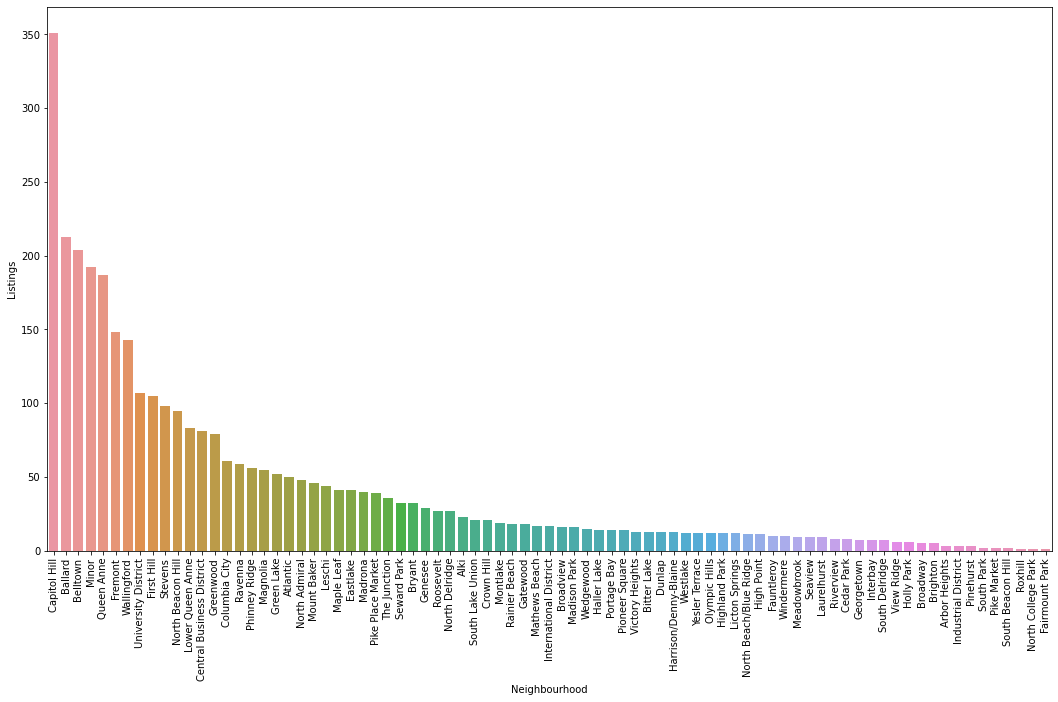

In [257]:
plt.figure(figsize=(18,10))
sns.barplot(nei_df.index, y ='listing_id', data = nei_df)
plt.xlabel("Neighbourhood")
plt.ylabel("Listings")
plt.xticks(rotation=90)

In [258]:
nei_df_score = listings_data_drop_noscore.groupby(['neighbourhood']).mean()
nei_df_score

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Alki,4.696241e+06,2.016010e+13,1.446755e+07,2.066667,2.066667,47.571247,-122.407906,4.800000,1.333333,1.800000,...,95.933333,9.666667,9.733333,9.866667,9.933333,9.866667,9.466667,NaN,1.266667,1.942000
Arbor Heights,3.961523e+06,2.016010e+13,9.899291e+06,1.000000,1.000000,47.510145,-122.381473,4.000000,1.166667,1.000000,...,98.000000,9.666667,9.666667,10.000000,10.000000,8.666667,9.333333,NaN,1.000000,1.030000
Atlantic,4.990743e+06,2.016010e+13,1.698489e+07,2.069767,2.069767,47.594735,-122.304955,3.697674,1.476744,1.395349,...,95.325581,9.627907,9.627907,9.813953,9.767442,9.093023,9.558140,NaN,1.744186,2.288140
Ballard,4.595025e+06,2.016010e+13,1.411351e+07,4.032787,4.032787,47.674746,-122.379717,3.371585,1.243169,1.387978,...,95.382514,9.737705,9.666667,9.907104,9.918033,9.759563,9.546448,NaN,1.726776,2.613169
Belltown,4.854635e+06,2.016010e+13,1.146514e+07,34.978022,34.978022,47.615000,-122.345383,3.956044,1.235955,1.121547,...,93.340659,9.478022,9.543956,9.582418,9.686813,9.807692,9.192308,NaN,5.060440,1.948901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallingford,4.118891e+06,2.016010e+13,1.009378e+07,5.168000,5.168000,47.659650,-122.333696,3.640000,1.224000,1.448000,...,94.168000,9.664000,9.440000,9.752000,9.800000,9.744000,9.520000,NaN,4.784000,1.662880
Wedgewood,2.761744e+06,2.016010e+13,5.986969e+06,2.700000,2.700000,47.690657,-122.290530,2.600000,1.050000,1.200000,...,94.000000,9.400000,9.300000,9.900000,9.800000,9.300000,9.400000,NaN,2.600000,1.521000
Westlake,5.153441e+06,2.016010e+13,2.193807e+07,1.250000,1.250000,47.631836,-122.342168,3.375000,1.687500,1.375000,...,96.500000,9.375000,9.375000,9.750000,9.875000,9.625000,9.375000,NaN,1.250000,1.321250


In [259]:
nei_df_score = nei_df_score.sort_values(by=['review_scores_value'], ascending=False)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 [Text(0, 0, 'Fauntleroy'),
  Text(1, 0, 'Roxhill'),
  Text(2, 0, 'Gatewood'),
  Text(3, 0, 'Yesler Terrace'),
  Text(4, 0, 'Madrona'),
  Text(5, 0, 'Rainier Beach'),
  Text(6, 0, 'Maple Leaf'),
  Text(7, 0, 'Highland Park'),
  Text(8, 0, 'Seaview'),
  Text(9, 0, 'Licton Springs'),
  Text(10, 0, 'North Delridge'),
  Text(11, 0, 'Genesee'),
  Text(12, 0, 'High Point'),
  Text(13, 0, 'Riverview'),
  Text(14, 0, 'Brighton'),
  Text(15, 0, 'Laurelhurst'),
  Text(16, 0, 'Harrison/Denny-Blaine'),
  Text(17, 0, 'Leschi'),
  Text(18, 0, 'Windermere'),
  Text(19, 0, 'Meadowbrook'),
  Text(20, 0, 'Victory Heights'),
  Text(21, 0, 'Green Lake'),

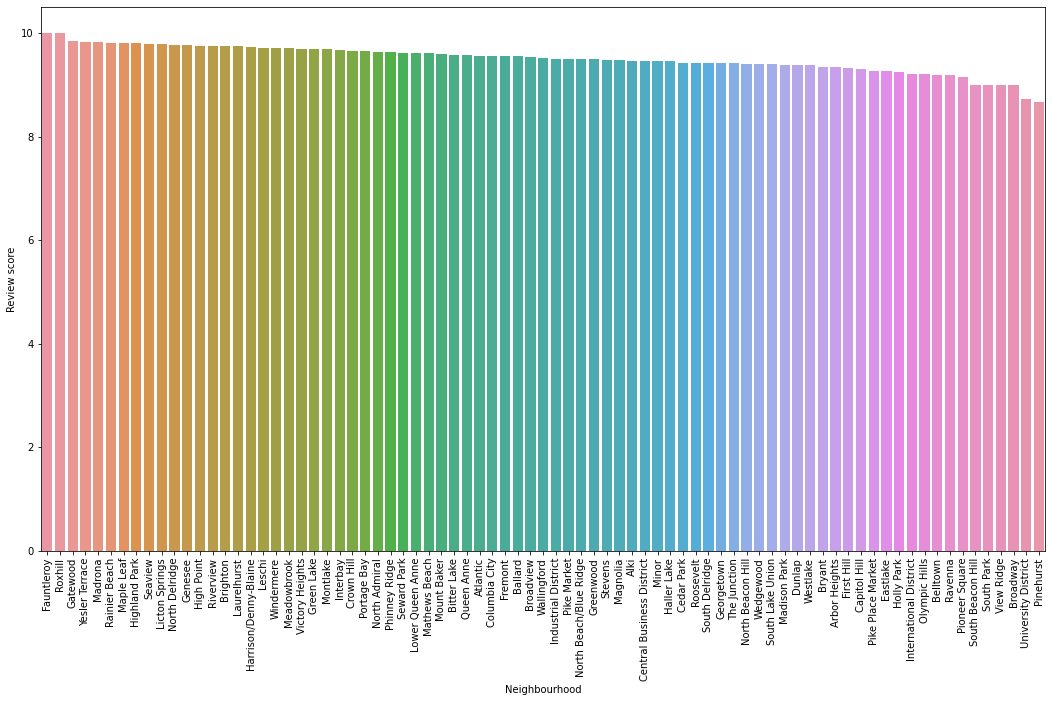

In [260]:
plt.figure(figsize=(18,10))
sns.barplot(nei_df_score.index, y ='review_scores_value', data = nei_df_score)
plt.xlabel("Neighbourhood")
plt.ylabel("Review score")
plt.xticks(rotation=90)